# Fig 1.26 GHG concentrations

Plotting the greenhouse gas concentrations which appear in Fig 1.26

## Authors

All notebooks and plots in this repository were generated by the following authors:

- Zebedee Nicholls zebedee.nicholls@climate-energy-college.org
- Jared Lewis jared.lewis@climate-resource.com
- Malte Meinshausen malte.meinshausen@unimelb.edu.au

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [3]:
import os.path

import matplotlib.pyplot as plt
import scmdata

import utils
import utils.plotting

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
plt.rcParams["pdf.use14corefonts"] = True
plt.rcParams["text.usetex"] = False
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["font.size"] = 14
plt.rcParams["figure.figsize"] = [15, 6]

<IPython.core.display.Javascript object>

In [5]:
SOURCE_FILE = os.path.join(
    utils.DATA_DIR, "processed", "cmip6-prescribed-concs", "cmip6-prescribed-concs.nc"
)
SOURCE_FILE

'/data2/ubuntu-znicholls/ar6-wg1-plots-and-processing/src/utils/../../data/processed/cmip6-prescribed-concs/cmip6-prescribed-concs.nc'

<IPython.core.display.Javascript object>

In [6]:
db = scmdata.ScmRun.from_nc(SOURCE_FILE).filter(scenario="*low*", keep=False)
db

/data/ubuntu-znicholls/miniconda3/envs/ar6-wg1-plots-and-processing/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


<scmdata.ScmRun (timeseries: 27, timepoints: 2500)>
Time:
	Start: 0001-07-03T12:00:00
	End: 2500-07-02T12:00:00
Meta:
	          model region     scenario unit                        variable
	0   unspecified  World   historical  ppb  Atmospheric Concentrations|CH4
	1   unspecified  World       ssp119  ppb  Atmospheric Concentrations|CH4
	2   unspecified  World       ssp126  ppb  Atmospheric Concentrations|CH4
	3   unspecified  World       ssp245  ppb  Atmospheric Concentrations|CH4
	4   unspecified  World       ssp370  ppb  Atmospheric Concentrations|CH4
	6   unspecified  World       ssp434  ppb  Atmospheric Concentrations|CH4
	7   unspecified  World       ssp460  ppb  Atmospheric Concentrations|CH4
	8   unspecified  World  ssp534-over  ppb  Atmospheric Concentrations|CH4
	9   unspecified  World       ssp585  ppb  Atmospheric Concentrations|CH4
	10  unspecified  World   historical  ppm  Atmospheric Concentrations|CO2
	11  unspecified  World       ssp119  ppm  Atmospheric Concentration

<IPython.core.display.Javascript object>

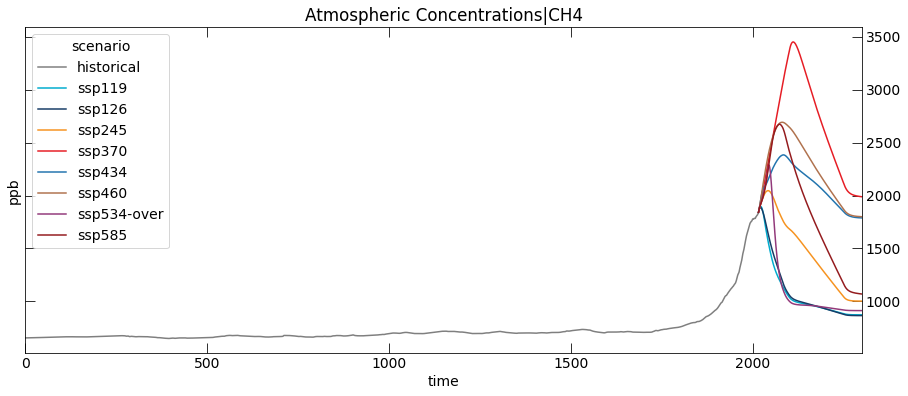

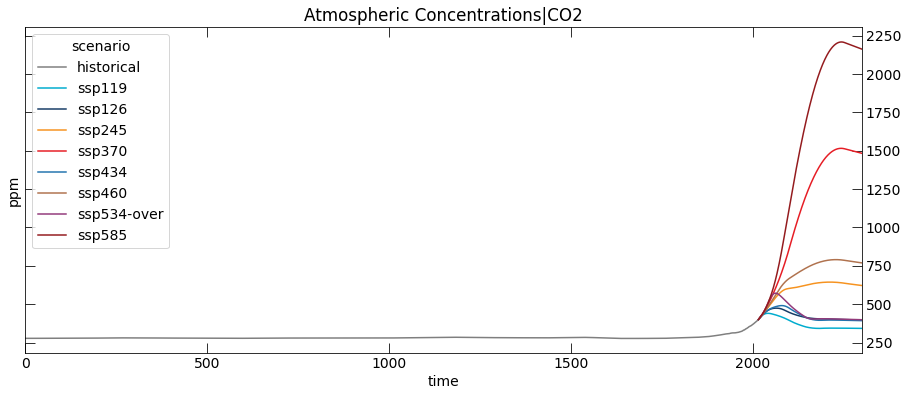

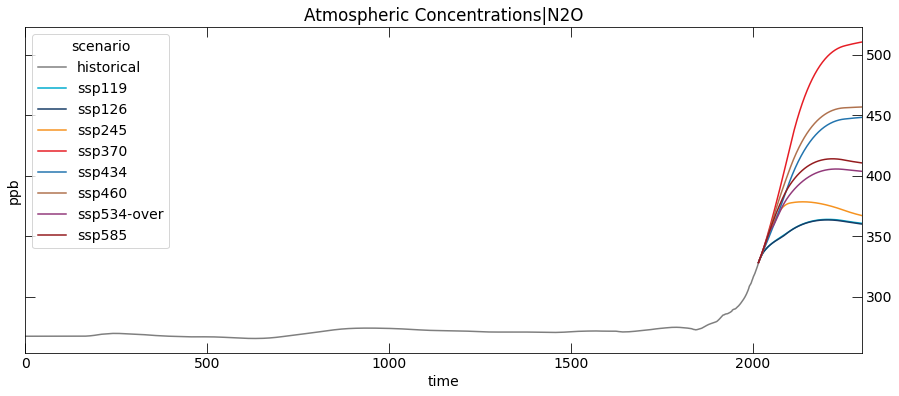

<IPython.core.display.Javascript object>

In [7]:
xmin = 0
xmax = 2300

for v in db.groupby("variable"):
    variable = v.get_unique_meta("variable", True)
    ax = v.filter(year=range(xmin, xmax + 1)).lineplot(
        palette=utils.plotting.SCENARIO_PALETTE,
        time_axis="year",  # legend=False
    )
    ax.tick_params(
        direction="in",
        length=10,
        top=True,
        #         labeltop=True,
        right=True,
        labelright=True,
        labelleft=False,
    )
    ax.set_title(variable)
    ax.set_xlim([xmin, xmax])
    #     plt.savefig(
    #         "COMMONERA_conc_{}.pdf".format(variable.split("|")[-1].lower()),
    #         transparent=True,
    #     )
    plt.show()